# Testing detection of strain variation with high-degree nodes within reads

Working off of "completed" E. coli genomes from the NCBI. Accession list is in data/ecoli/asssembly_results.txt

Pre-analysis as follows to generate short reads from E. coli genomes, node graphs, and high-degree node csv files: 

```
bash generate-reads.sh    

bash generate-ng-01.sh
bash generate-ng-02.sh
bash generate-ng-0n.sh n
bash generate-ng-shuffle-n.sh n iterations

```


In [1]:
import glob 
import matplotlib.pyplot as plt
import pandas as pd
import palettable as pal
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# download the ng counts into pd-dataframes stored in hash
def import_hdncsv_folder(folder):
    outhash={}
    for file in glob.glob(folder+'/*csv'):
        name=file.split('/')[1].split('.')[0]
        df=pd.read_csv(file)  
        outhash[name]=df
    return outhash

def normalize_to_reads(df, col, newcol):
    df[newcol]=df[col]/df[col].sum()
    return df

## 20 random subset to look at smaller section of genomes

In [3]:
# Download the ng counts from the 20 random

ng01 = import_hdncsv_folder('ng-01')
ng02 = import_hdncsv_folder('ng-02')
ng03 = import_hdncsv_folder('ng-03')
ng06 = import_hdncsv_folder('ng-06')
ng10 = import_hdncsv_folder('ng-10')
ng15 = import_hdncsv_folder('ng-15')
ng20 = import_hdncsv_folder('ng-20')

hashs=[ng01,ng02,ng03,ng06,ng10,ng15,ng20]

#calculate proportion of reads (p_reads)
for ng in hashs:
    for key in ng:
        df=ng[key]
        df=normalize_to_reads(df, 'n_reads', 'p_reads')
        ng[key]

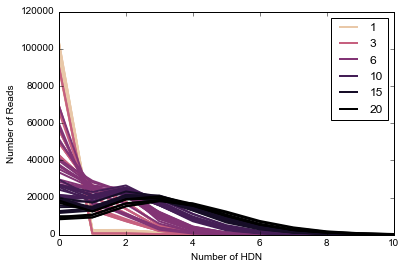

In [4]:
fig,ax = plt.subplots(1)

# ax.set_yscale('log')
cs = pal.cubehelix.red_16_r.mpl_colormap
norm = colors.LogNorm(vmin=.5, vmax=20)
m = cm.ScalarMappable(norm=norm, cmap=cs)

lw=2

hashs=[ng01,ng02,ng03,ng06,ng10,ng15,ng20]
labs=[1,3,6,10,15,20]

for ngs, ll in zip(hashs, labs):

    for key in ngs:
        ngs[key].plot(x='hdn_count', y='n_reads', ax=ax, color=m.to_rgba(ll), legend=False, lw=lw, label=ll)

lines, labels = ax.get_legend_handles_labels()    
# get_labels
lset=list(set(labels))
lset.sort(key=int)
label=[]
line=[]
for l in lset:
    i=labels.index(l)
    label+=[labels[i]]
    line+=[lines[i]]
ax.legend(line, label)

ax.set_xlim([0,10])
ax.set_xlabel('Number of HDN')
ax.set_ylabel('Number of Reads')




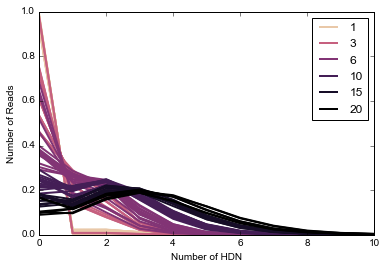

In [5]:
fig,ax = plt.subplots(1)

# ax.set_yscale('log')
cs = pal.cubehelix.red_16_r.mpl_colormap
norm = colors.LogNorm(vmin=.5, vmax=20)
m = cm.ScalarMappable(norm=norm, cmap=cs)

lw=2

hashs=[ng01,ng02,ng03,ng06,ng10,ng15,ng20]
labs=[1,3,6,10,15,20]

for ngs, ll in zip(hashs, labs):

    for key in ngs:
        ngs[key].plot(x='hdn_count', y='p_reads', ax=ax, color=m.to_rgba(ll), legend=False, lw=lw, label=ll)

lines, labels = ax.get_legend_handles_labels()    
# get_labels
lset=list(set(labels))
lset.sort(key=int)
label=[]
line=[]
for l in lset:
    i=labels.index(l)
    label+=[labels[i]]
    line+=[lines[i]]
ax.legend(line, label)

ax.set_xlim([0,10])
ax.set_xlabel('Number of HDN')
ax.set_ylabel('Number of Reads')




## Random sets of 10, 20, 25, etc. E. coli genomes 

In [6]:
ngs10 = import_hdncsv_folder('ng-shuffle-10')
ngs20 = import_hdncsv_folder('ng-shuffle-20')
ngs25 = import_hdncsv_folder('ng-shuffle-25')
ngs30 = import_hdncsv_folder('ng-shuffle-30')
ngs50 = import_hdncsv_folder('ng-shuffle-50')
ngs100 = import_hdncsv_folder('ng-shuffle-100')
ngs311 = import_hdncsv_folder('ng-shuffle-311')

hashs=[ng01, ngs10,ngs20,ngs25,ngs30,ngs50,ngs100,ngs311]
#calculate proportion of reads (p-reads)
for ng in hashs:
    for key in ng:
        df=ng[key]
        df=normalize_to_reads(df, 'n_reads', 'p_reads')
        ng[key]

In [ ]:
fig,axs = plt.subplots(2)
fig.set_size_inches(6,6)
# ax.set_yscale('log')
cs = pal.cubehelix.purple_16_r.mpl_colormap
norm = colors.LogNorm(vmin=.5, vmax=250)
m = cm.ScalarMappable(norm=norm, cmap=cs)

lw=2

hashs=[ng01, ngs10,ngs20,ngs25,ngs30,ngs50,ngs100, ngs311]
labs=[1,10,20,25,30,50,100, 311]
ax=axs[0]
ax2=axs[1]
for ngs, ll in zip(hashs, labs):

    for key in ngs:
        ngs[key].plot(x='hdn_count', y='n_reads', ax=ax, color=m.to_rgba(ll), legend=False, lw=lw, label=ll, 
                     xlim=[0,20])
        ngs[key].plot(x='hdn_count', y='n_reads', ax=ax2, color=m.to_rgba(ll), legend=False, lw=lw, label=ll,
                     ylim=[0,30000], xlim=[0,20])


lines, labels = ax.get_legend_handles_labels()    
# get_labels
lset=list(set(labels))
lset.sort(key=int)
label=[]
line=[]
for l in lset:
    i=labels.index(l)
    label+=[labels[i]]
    line+=[lines[i]]
ax.legend(line, label, bbox_to_anchor=(1.3, 1))

ax.set_xlabel('')
ax.set_ylabel('Number of Reads')
ax2.set_xlabel('Number of HDN per read')
ax.set_ylabel('Number of Reads')


In [ ]:
fig,axs = plt.subplots(2)
fig.set_size_inches(6,6)
# ax.set_yscale('log')
cs = pal.cubehelix.purple_16_r.mpl_colormap
norm = colors.LogNorm(vmin=.5, vmax=100)
m = cm.ScalarMappable(norm=norm, cmap=cs)

lw=2

hashs=[ng01, ngs10,ngs20,ngs25,ngs30,ngs50,ngs100,ngs311]
labs=[1,10,20,25,30,50,100,311]
ax=axs[0]
ax2=axs[1]
for ngs, ll in zip(hashs, labs):

    for key in ngs:
        ngs[key].plot(x='hdn_count', y='p_reads', ax=ax, color=m.to_rgba(ll), legend=False, lw=lw, label=ll)
        ngs[key].plot(x='hdn_count', y='p_reads', ax=ax2, color=m.to_rgba(ll), legend=False, lw=lw, label=ll, 
                     ylim=[0,0.3])

lines, labels = ax.get_legend_handles_labels()    
# get_labels
lset=list(set(labels))
lset.sort(key=int)
label=[]
line=[]
for l in lset:
    i=labels.index(l)
    label+=[labels[i]]
    line+=[lines[i]]
ax.legend(line, label, bbox_to_anchor=(1.3, 1))

ax.set_xlabel('')
ax.set_ylabel('Number of Reads')
ax2.set_xlabel('Number of HDN per read')
ax.set_ylabel('Number of Reads')


## Some conclusions

What you can see fairly clearly is the slow smoothing of the curve. It would appear that there is a nice poisson distribution (???) with the peak greater and greater with the more strains that are included. There is some variation (but not too much) associated with different subsets of strains being selected. 


Something fairly interesting is that there seems to be a subset of reads that have 0 HDNs. I wonder if they are consistent regardless of strains. Sort of a 'core' section of the genome that is fairly static for a specific species? 

I also wonder how much variability there is with different taxa. E.g. would Prochlorococcus be different? What about a slower growing organism? 

